# 이미지 분석
## openCV

In [0]:
import cv2
import matplotlib.pyplot as plt


In [14]:
!curl -L https://www.dropbox.com/s/v4225z25x0zz4y3/pool.jpg \
    -o pool.jpg
img = cv2.imread("pool.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1587k  100 1587k    0     0  1114k      0  0:00:01  0:00:01 --:--:-- 1114k


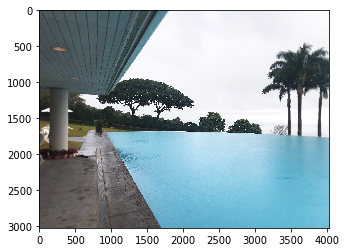

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis("off")
plt.show()

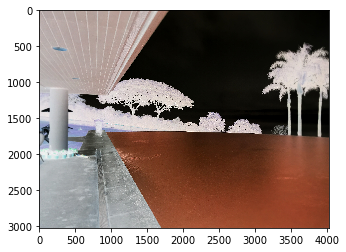

In [18]:
img2 = 255 - img
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

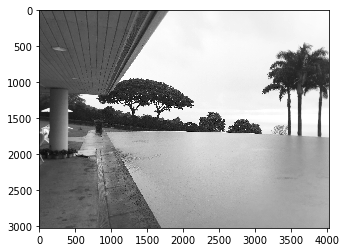

In [20]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

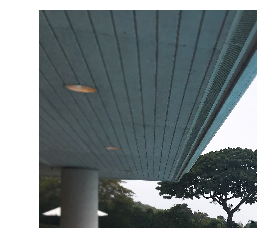

In [22]:
# 폭과 높이 조정
im2 = img[0:1500, 0:1500]
plt.imshow (cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [25]:
cv2.imwrite('test.jpg',im2)

True

In [27]:
img.shape

(3024, 4032, 3)

## 얼굴인식

In [40]:
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \-o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   170  100   170    0     0    867      0 --:--:-- --:--:-- --:--:--   867
100  660k  100  660k    0     0  1449k      0 --:--:-- --:--:-- --:--:-- 1449k


In [0]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1733k  100 1733k    0     0  1222k      0  0:00:01  0:00:01 --:--:-- 11.1M


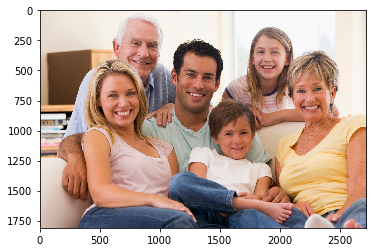

In [42]:
!curl -L https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg -o families.jpg
img = cv2.imread("families.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [0]:
# 얼굴 인식하기
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

In [0]:
# 결과 확인하기
if len(face_list) == 0:
  print("얼굴 인식 실패")
  quit()

In [45]:
for (x,y,w,h) in face_list:
  print("얼굴의 좌표 = ",x,y,w,h)
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)

얼굴의 좌표 =  676 144 381 381
얼굴의 좌표 =  1736 231 313 313
얼굴의 좌표 =  1126 393 401 401
얼굴의 좌표 =  2065 535 352 352
얼굴의 좌표 =  482 551 396 396
얼굴의 좌표 =  1472 906 322 322


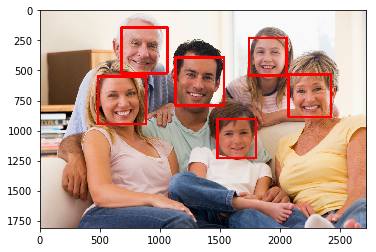

In [46]:
cv2.imwrite("face-detect.png",img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

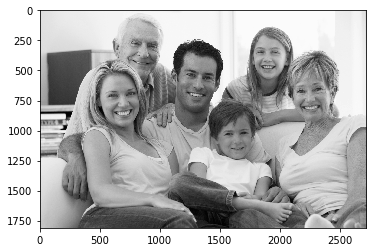

In [47]:
# 그레이 이미지로 출력하기
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [0]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

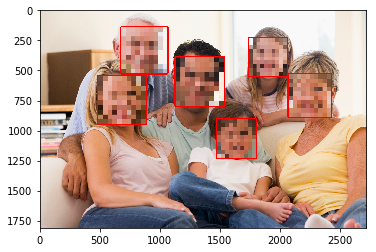

In [49]:
# 얼굴 부분만 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
# cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 손글씨 숫자 인식

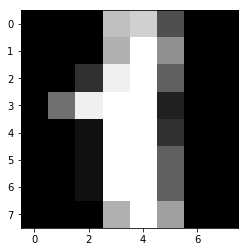

In [51]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [52]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


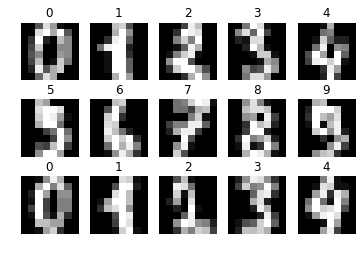

In [53]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.axis("off")
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap="gray")
plt.show()

In [76]:
x = digits.images
x = x.reshape((-1, 64))

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.94


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [77]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [0]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 
    # 흑백 반전
    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

In [0]:
img = cv2.imread("8.png")

8.png = 8


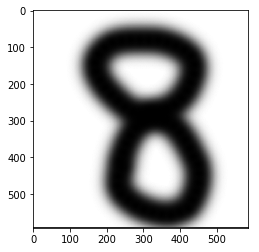

In [113]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("8.png")
print("8.png = " + str(n))
plt.show()